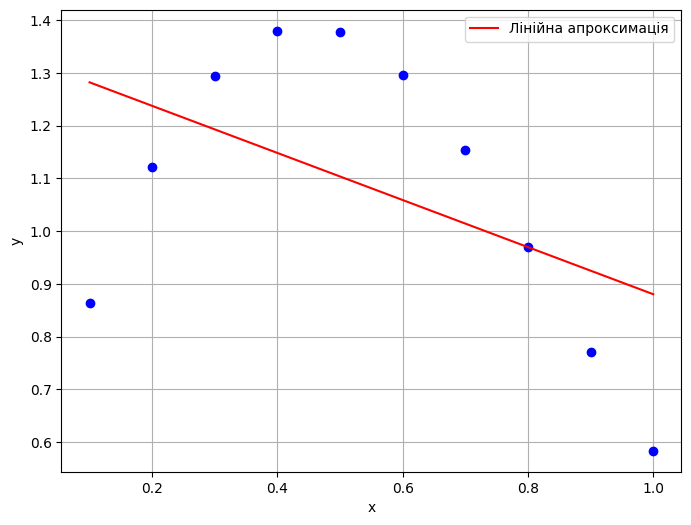

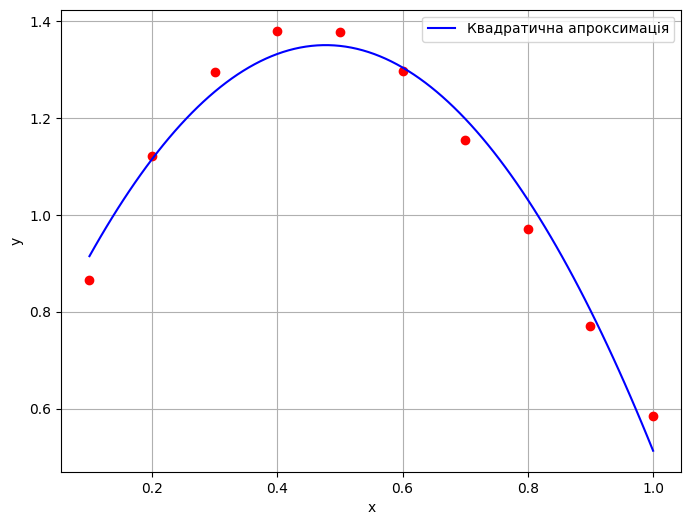

In [134]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def true_function(x):
    return np.cos(3*x - 1) + x

def linear_approximation_model(params, x):
    a, b = params
    return a * x + b

def cost_function_linear_approximation(params, x, y):
    return linear_approximation_model(params, x) - y

def quadratic_approximation_model(coefficients, x):
    return coefficients[0] * x**2 + coefficients[1] * x + coefficients[2]

def quadratic_coefficients_approximation(x, y):
    def cost_function_quadratic(coefficients, x, y):
        return quadratic_approximation_model(coefficients, x) - y
    initial_quadratic_params = np.ones(3) 
    quadratic_approx = least_squares(cost_function_quadratic, initial_quadratic_params, args=(x, y))
    return quadratic_approx.x

# Діапазон значень x для лінійної апроксимації
x_linear_true = np.arange(0.1, 1.1, 0.1)
y_linear_true = true_function(x_linear_true)
initial_linear_params_true = [1.0, 0.0]
result_linear_true = least_squares(cost_function_linear_approximation, initial_linear_params_true, args=(x_linear_true, y_linear_true))
a_linear_true, b_linear_true = result_linear_true.x
linear_approximation_true = linear_approximation_model([a_linear_true, b_linear_true], x_linear_true)

# Графік лінійної апроксимації
plt.figure(figsize=(8, 6))
plt.plot(x_linear_true, y_linear_true, marker="o", linestyle=" ", color="blue")
plt.plot(x_linear_true, linear_approximation_true, label=f"Лінійна апроксимація", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Діапазон значень x для квадратичної апроксимації
x_quadratic_true = np.arange(0.1, 1.1, 0.1)
y_quadratic_true = true_function(x_quadratic_true)
coefficients_quadratic_true = quadratic_coefficients_approximation(x_quadratic_true, y_quadratic_true)
x_parabola_true = np.linspace(min(x_quadratic_true), max(x_quadratic_true), 100)
y_parabola_true = quadratic_approximation_model(coefficients_quadratic_true, x_parabola_true)

# Графік квадратичної апроксимації
plt.figure(figsize=(8, 6))
plt.plot(x_quadratic_true, y_quadratic_true, marker="o", linestyle=" ", color="red")
plt.plot(x_parabola_true, quadratic_approximation_model(coefficients_quadratic_true, x_parabola_true), label=f"Квадратична апроксимація", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()